In [51]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv', header = 0)
val  = pd.read_csv('val.csv' , header = 0)

full_data = pd.concat([train, val], axis=0, ignore_index=True)

train.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
1,42348,Male,72.0,0,1,Yes,Self-employed,Urban,63.86,29.5,smokes,0
2,28447,Female,53.0,1,0,Yes,Private,Rural,216.88,31.4,smokes,0
3,59933,Female,29.0,0,0,No,Private,Rural,108.75,24.1,Unknown,0
4,29792,Female,49.0,0,0,Yes,Private,Rural,85.23,25.4,Unknown,0
5,64029,Male,55.0,1,0,Yes,Private,Urban,168.06,23.5,smokes,0
6,20426,Female,78.0,1,0,No,Private,Urban,203.87,45.7,never smoked,1
7,55847,Male,19.0,0,0,No,Private,Rural,106.70,24.0,never smoked,0
8,5046,Male,17.0,0,0,No,Self-employed,Urban,98.42,23.4,Unknown,0
9,59915,Female,53.0,0,0,No,Private,Urban,129.43,29.6,never smoked,0


Let's take a look at retrieved data numeric features distributions.

In [2]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3933.000000,4088.000000
mean,36423.508562,43.399080,0.093689,0.055528,106.004207,28.919247,0.048679
std,21132.593063,22.584146,0.291431,0.229037,44.904654,7.714440,0.215223
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17756.500000,25.000000,0.000000,0.000000,77.457500,23.700000,0.000000
50%,36876.500000,45.000000,0.000000,0.000000,92.060000,28.100000,0.000000
75%,54529.500000,61.000000,0.000000,0.000000,113.850000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,78.000000,1.000000


Seems like there is less than 25% of positive stroke cases. Mean value for target reveals that there is only around 5% of positive class instances.<br>Here's our data summary:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3933 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 383.4+ KB


Looks like the only feature with missing values is bmi, we will investigate this further.

Let's explore absolute number of samples for each class.

In [3]:
from collections import Counter

cnt = Counter(train.stroke)

print(cnt, Counter(val.stroke))
print(f'Degree of imbalance: {round(cnt[1]/sum(cnt.values())*100, 2)}%')

Counter({0: 3889, 1: 199}) Counter({0: 972, 1: 50})
Degree of imbalance: 4.87%


Degree of imbalance is moderate. Here is visualization.

<AxesSubplot:xlabel='stroke', ylabel='count'>

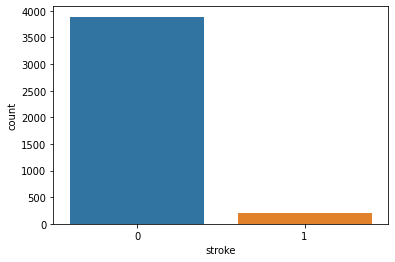

In [4]:
import seaborn as sns
import plotly.express as px

sns.color_palette('bright')
sns.countplot(x=train.stroke)

Intuitively, elderly patients should be more prone to heart stroke, so let's check it:

<AxesSubplot:xlabel='age', ylabel='Count'>

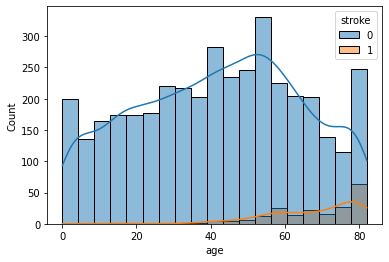

In [6]:
sns.histplot(train, x='age', hue='stroke', kde=True)

And yes, age plays an important role. Let's apply binning to see ratio of cases within each group.

In [73]:
train['CategAge'] = pd.qcut(train.age, 19)
train[['CategAge', 'stroke']].groupby(['CategAge'], as_index = False).mean()

,CategAge,stroke
0,"(0.079, 5.0]",0.000000
1,"(5.0, 12.0]",0.000000
2,"(12.0, 17.0]",0.004525
3,"(17.0, 22.0]",0.000000
4,"(22.0, 26.0]",0.000000
5,"(26.0, 31.0]",0.000000
6,"(31.0, 35.0]",0.005051
7,"(35.0, 39.842]",0.018868
8,"(39.842, 43.0]",0.008584
9,"(43.0, 47.0]",0.020921


Heart issiues for sure should be associated with higher risk of stroke

In [8]:
train[['hypertension', 'stroke']].groupby(['hypertension'], as_index = False).mean()

,hypertension,stroke
0,0,0.040216
1,1,0.130548


In [9]:
train[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index = False).mean()

,heart_disease,stroke
0,0,0.041699
1,1,0.167401


What about civil status?

In [ ]:
train[['ever_married', 'stroke']].groupby(['ever_married'], as_index = False).mean()

,ever_married,stroke
0,No,0.013718
1,Yes,0.066593


Seems like never married people have slightly more chances to avoid heart stroke :) <br>
But it is not as significant as age or heart issues.

Let's inspect gender impact on stroke occurence

In [36]:
train[['gender', 'stroke']].groupby(['gender'], as_index=False).mean()

,gender,stroke
0,Female,0.046550
1,Male,0.051755
2,Other,0.000000


Wow, that's something strange here! How many samples of each group are there?

In [41]:
train[['gender', 'stroke']].groupby(['gender'], as_index=False).count()

,gender,stroke
0,Female,2406
1,Male,1681
2,Other,1


Alright, I will replace this 'Other' case with minority group

In [54]:
train = train.replace({'gender':'Other'}, 'Male')

Let's examine the assumption that either of genders having ever been married has higher ratio of strokes

In [57]:
train[['gender', 'ever_married', 'stroke']].groupby(['gender', 'ever_married'], as_index = False).mean()

,gender,ever_married,stroke
0,Female,No,0.019133
1,Female,Yes,0.059803
2,Male,No,0.006656
3,Male,Yes,0.076781


Clearly, male patients are more likely to get stroke if they have been ever married than females, and less likely for never married respevtively

Does occupacy style have an impact on stroke rate?

<AxesSubplot:xlabel='work_type', ylabel='Count'>

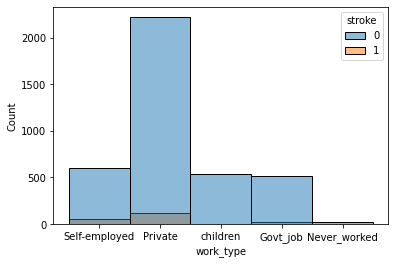

In [11]:
sns.histplot(train, x='work_type', hue='stroke')

In [ ]:
train[['work_type', 'stroke']].groupby(['work_type'], as_index=False).mean()

,work_type,stroke
0,Govt_job,0.042672
1,Never_worked,0.000000
2,Private,0.051238
3,Self-employed,0.084485
4,children,0.001866


Obviously, self-employed workers have more stress which may cause higher stroke rates. <br>
However, there is something unusual about children having stroke

In [63]:
train[['work_type', 'stroke']].value_counts()

work_type      stroke
Private        0         2222
Self-employed  0          596
children       0          535
Govt_job       0          516
Private        1          120
Self-employed  1           55
Govt_job       1           23
Never_worked   0           20
children       1            1
dtype: int64

In [70]:
train[(train.work_type == 'children') & (train.stroke == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3835,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1


Humm, looks like an anomaly

Let's inspect influence of resisence type

In [13]:
train[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index = False).mean()

,Residence_type,stroke
0,Rural,0.043890
1,Urban,0.053289


Almost no difference

Now let's explore our two continuous features

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

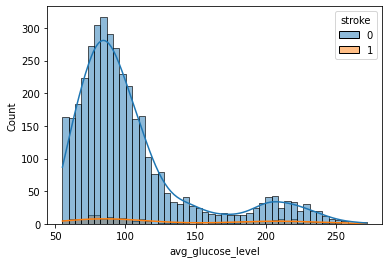

In [14]:
sns.histplot(train, x='avg_glucose_level', hue='stroke', kde=True)

Looks like two overalapping distributions, close to normal but slighttly skewed

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

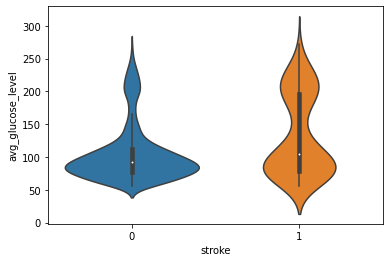

In [68]:
sns.violinplot(data=train, x='stroke', y='avg_glucose_level')

Both classes share the same distribution, let's normalize this feature

In [86]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

train['NormGlucose'] = normalizer.fit_transform(train.avg_glucose_level.values.reshape(-1, 1))
train['NormGlucose'].nsmallest()

280     0.000000
3889    0.000462
1916    0.000508
3976    0.000646
2679    0.000739
Name: NormGlucose, dtype: float64

Here's distribution for BMI feature having missing values

<AxesSubplot:xlabel='bmi', ylabel='Count'>

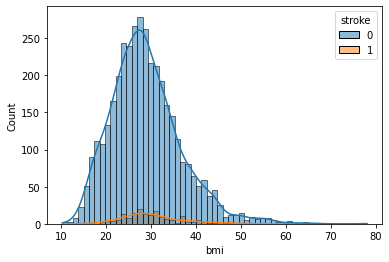

In [76]:
sns.histplot(train, x='bmi', hue='stroke', kde=True)

In order to fill NaNs, let's try to replicate this gamma-like distribution

155


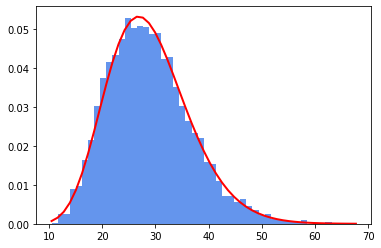

In [78]:
import matplotlib.pyplot as plt
import scipy.special as sps  

bmi_avg = train.bmi.mean()
bmi_std = train.bmi.std()
bmi_nan_count = train.bmi.isna().sum()
print(bmi_nan_count)

shape, scale = bmi_avg**2/bmi_std**2, bmi_std**2/bmi_avg

bmi_distr = np.random.gamma(shape, scale, train.shape[0])

count, bins, ignored = plt.hist(bmi_distr, 50, density=True, color='cornflowerblue')
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

In [79]:
print(f'BMI nan values ratio {round(bmi_nan_count/train.shape[0], 2)}')

BMI nan values ratio 0.04


I will use ``missingno`` package to locate NaNs

<AxesSubplot:>

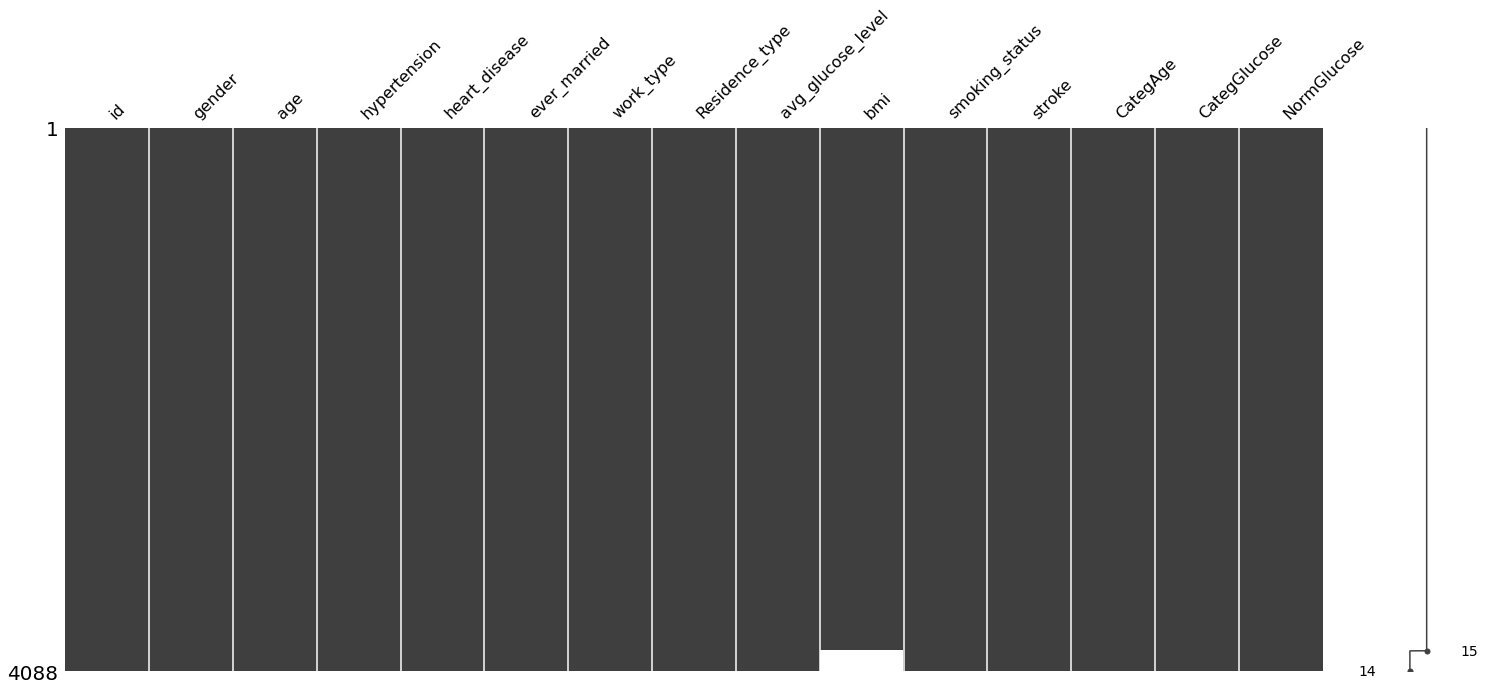

In [21]:
import missingno as msno

msno.matrix(train.sort_values(by='bmi', ascending=False))

That's interesting, missing values meant to be the largest. Let's try to replace them with normal distribution, similar to one seen with the case of avg_gclucose_level.

In [80]:
bmi_fill_na = pd.Series(np.round(np.random.normal(70, bmi_std/2.0, bmi_nan_count), 1), 
                        index=train[np.isnan(train.bmi)].index)
print(bmi_fill_na.nlargest(10))
train['bmi'] = train['bmi'].fillna(value=bmi_fill_na)

1805    78.5
105     77.3
2617    77.3
1627    76.7
2755    76.7
164     76.1
554     76.1
1935    76.1
2669    76.1
4081    75.7
dtype: float64


In [81]:
train.bmi.nlargest(5)

1805    78.5
2914    78.0
105     77.3
2617    77.3
1627    76.7
Name: bmi, dtype: float64

Here is the result. In fact, positive class distribution seems to have small second peak around 70, so this was right guess :)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

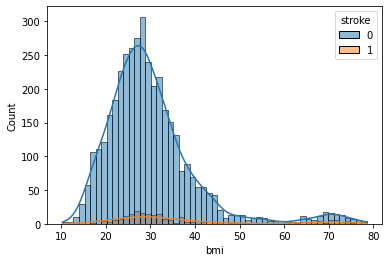

In [82]:
sns.histplot(train, x='bmi', hue='stroke', kde=True)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

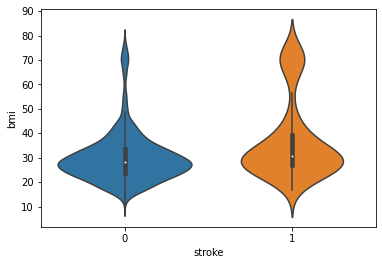

In [83]:
sns.violinplot(data=train, x='stroke', y='bmi')

It is clear from binning that last BMI category has the highest ratio of strokes

In [25]:
train['CategBMI'] = pd.cut(train.bmi, 10)

train[['CategBMI', 'stroke']].groupby(['CategBMI'], as_index=False).mean()

,CategBMI,stroke
0,"(10.232, 17.07]",0.007042
1,"(17.07, 23.84]",0.020761
2,"(23.84, 30.61]",0.051316
3,"(30.61, 37.38]",0.052573
4,"(37.38, 44.15]",0.038997
5,"(44.15, 50.92]",0.070000
6,"(50.92, 57.69]",0.025641
7,"(57.69, 64.46]",0.105263
8,"(64.46, 71.23]",0.204301
9,"(71.23, 78.0]",0.218182


Moreover, there are several papers showing correaltion between BMI and blood sugar (glucose) level, for instance [this one](https://doi.org/10.3402/mehd.v25.22857) (Sepp et all., 2014)

Finally, let's examine smoking habits impact on stroke outcome

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

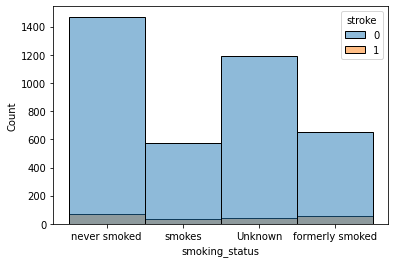

In [ ]:
sns.histplot(train, x='smoking_status', hue='stroke')

Seems that formerly smoked patients and smoking ones are more likely to experience the stroke. Well, as expected. However, there is no large difference in stroke probabilities between groups.

In [27]:
train[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index = False).mean()

,smoking_status,stroke
0,Unknown,0.031656
1,formerly smoked,0.079433
2,never smoked,0.044834
3,smokes,0.057190


For instance, let's examine influence of heart related issues at once

In [95]:
train[['smoking_status', 'hypertension', 'heart_disease', 'stroke']].groupby(['smoking_status', 'hypertension', 'heart_disease'], as_index = False).mean()

,smoking_status,hypertension,heart_disease,stroke
0,Unknown,0,0,0.024221
1,Unknown,0,1,0.205882
2,Unknown,1,0,0.105263
3,Unknown,1,1,0.000000
4,formerly smoked,0,0,0.064799
5,formerly smoked,0,1,0.145833
6,formerly smoked,1,0,0.130435
7,formerly smoked,1,1,0.176471
8,never smoked,0,0,0.029208
9,never smoked,0,1,0.118644


Of course, people with full set of these issues are subject to heart stroke the most. Still, smoking only does not play an important role in stroke occurence if there is no relatesd heart problems.

Now, let's examine some correlations between similar features

In [29]:
CrossTabRes = pd.crosstab(train.heart_disease, train.hypertension,
            #values=train.stroke, aggfunc='mean'
            )
CrossTabRes

hypertension,0,1
heart_disease,,
0,3529,332
1,176,51


In [30]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(CrossTabRes)
critical = chi2.ppf(.95, dof)
print('Test-statistic analysis')
if abs(stat) >= critical:
    print('Dependent')
else:
    print('Independent')
print('p-value analysis')    
if p <= .05:
    print('Dependent')
else:
    print('Independent')


Test-statistic analysis
Dependent
p-value analysis
Dependent


In [87]:
train['NormBMI'] = normalizer.fit_transform(train.bmi.values.reshape(-1, 1))
train['NormBMI'].nlargest()

1805    1.000000
2914    0.992669
105     0.982405
2617    0.982405
1627    0.973607
Name: NormBMI, dtype: float64

In [88]:
train['NormBMI'].corr(train['NormGlucose'], method='pearson')

0.18121102063975963

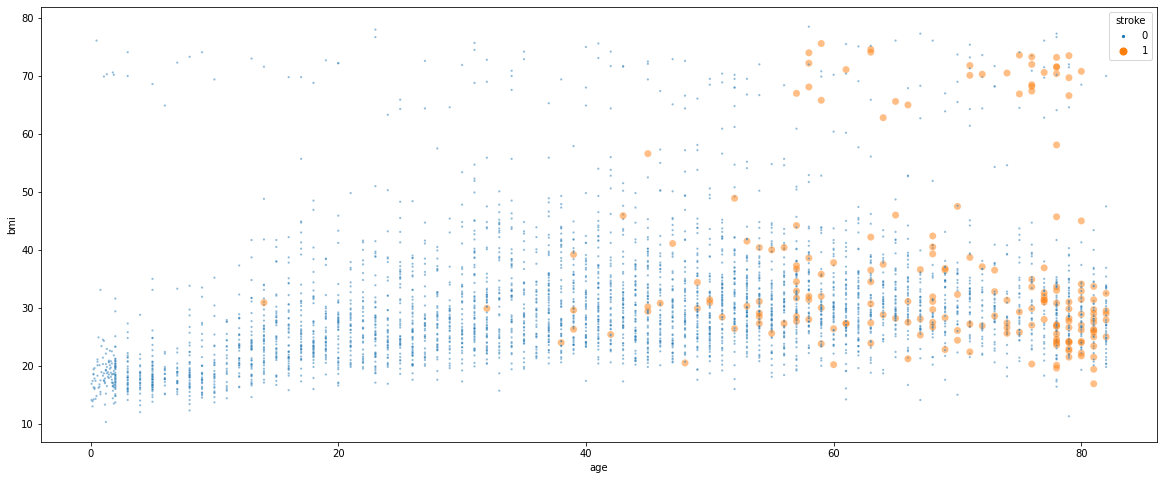

In [103]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.scatterplot(ax=ax, data=train, x='age', y='bmi', hue='stroke', size='stroke', sizes=(50, 5), alpha=0.5)

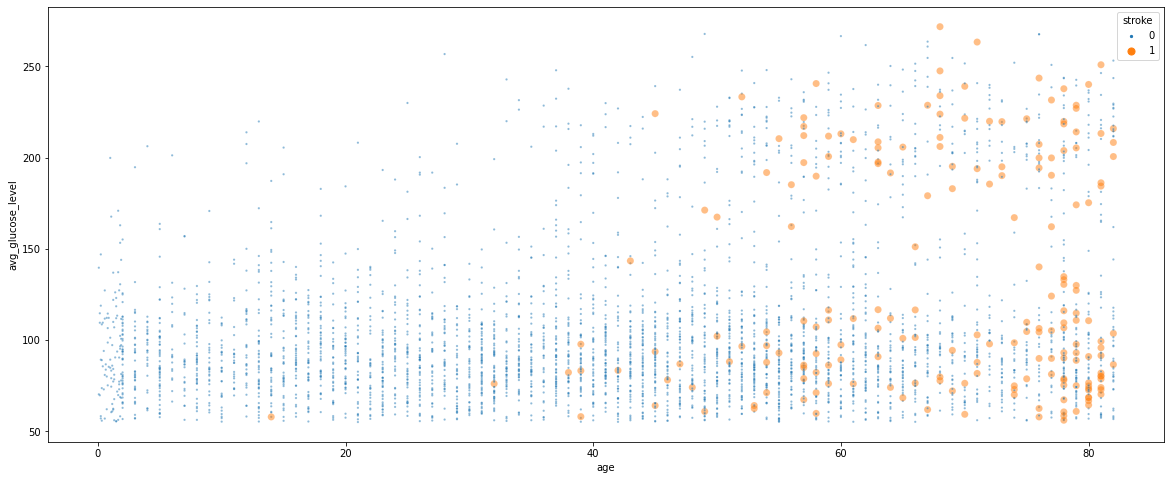

In [102]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.scatterplot(ax=ax, data=train, x='age', y='avg_glucose_level', hue='stroke', size='stroke', sizes=(50, 5), alpha=0.5)

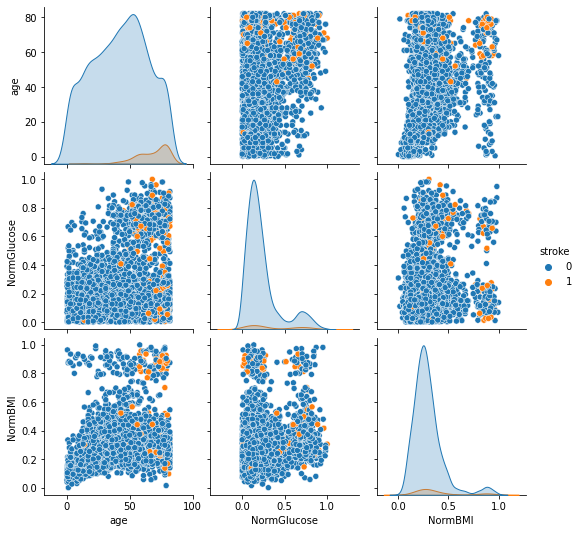

In [91]:
features=['age','NormGlucose','NormBMI','stroke']
sns.pairplot(train[features], hue='stroke')

In [36]:
drop_elements = ['id', 'gender', 'Residence_type']

In [37]:
data = train.drop(axis=1, columns=drop_elements)